In [2]:
# Importing Pandas Library
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
titanic_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex  Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male   27      0      0      211536  13.00   NaN        S  
887  female   19      0      0      112053  30.00   B42        S  
888  female  NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male   26      0      0      111369  30.00  C148        C  
890    male   32      0      0      370376   7.75   NaN        Q

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
# Importing numpy and various visualization Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

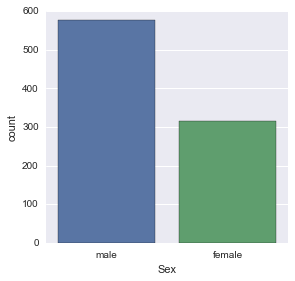

In [7]:
sns.factorplot('Sex',data=titanic_df,kind="count")

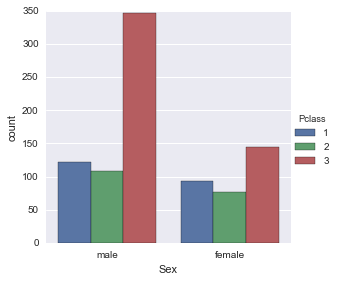

In [8]:
sns.factorplot('Sex',data=titanic_df,kind="count",hue='Pclass')

In [9]:
#From the above plot we can say that most of the males are from 3rd class category

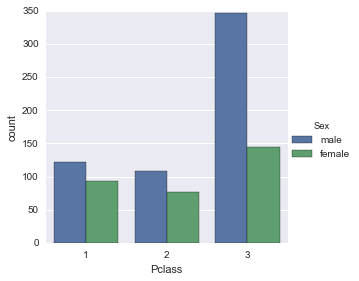

In [8]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind="count")

In [11]:
# Above plot shows different type of passengers according to their sex and travelling class

In [9]:
# Creating a function which tells us the passenger is male,female or a child

def male_female_child(passenger):
    age,sex = passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df[0:10]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male  NaN      0   
6                            McCarthy, Mr. Timothy J    male   54      0   
7                     Palsson, Master. Gosta Leonard    male    2      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female   14      1   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male  
5      0            330877   8.4583   NaN        Q    male  
6      0             17463  51.8625   E46        S    male  
7      1            349909  21.0750   NaN        S   child  
8      2            347742  11.1333   NaN        S  female  
9      0            237736  30.0708   NaN        C   child

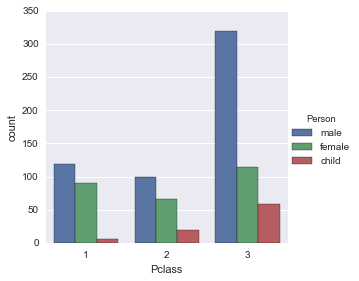

In [12]:
sns.factorplot('Pclass',data=titanic_df,hue='Person',kind="count")

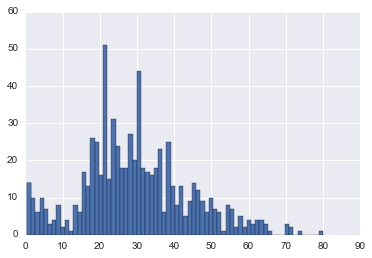

In [13]:
titanic_df['Age'].hist(bins=70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
# The avearge age of a passenger travelling in the ship was 29.7

In [15]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

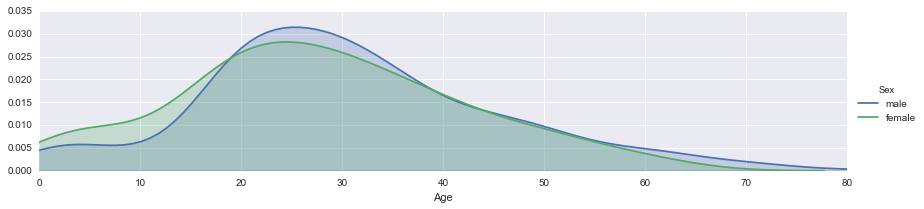

In [16]:
# Generating Kernel Density Plots
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

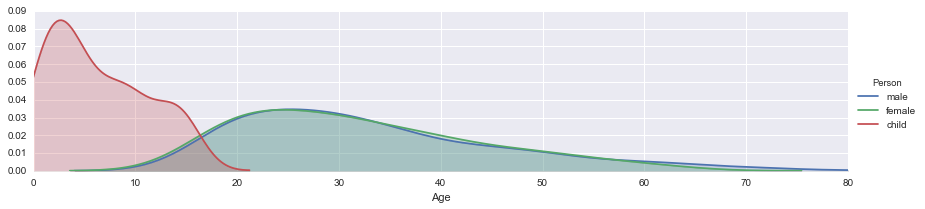

In [17]:
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [29]:
# Above plot shows the age distribution of children and adults

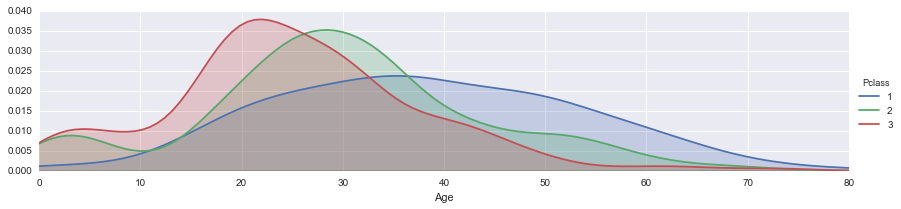

In [18]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [19]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [20]:
# We are now starting to analyze what deck were the passengers on and how does that relate to their class
# Dropping Null(NaN) values from cabin Column 
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

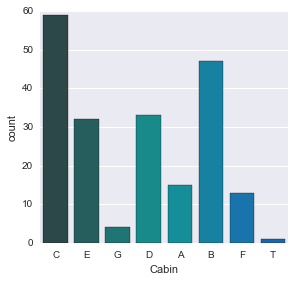

In [22]:
levels = []

for i in deck:
    levels.append(i[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',kind="count",data=cabin_df,palette='winter_d')

In [ ]:
# Above figure shows us the no. of people reserved in different cabins of the ship

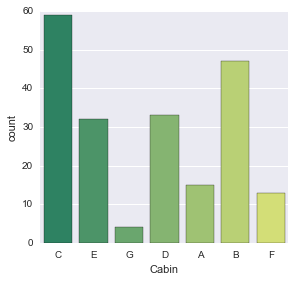

In [23]:
cabin_df = cabin_df[cabin_df.Cabin!='T']
sns.factorplot('Cabin',kind="count",data=cabin_df,palette='summer')


In [24]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

C:\Users\dines_000\Anaconda2\lib\site-packages\seaborn\categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


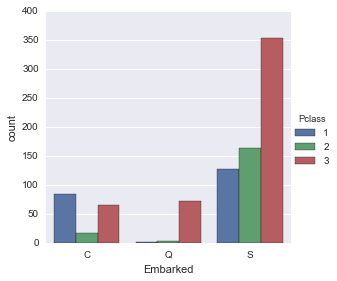

In [25]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind="count",x_order=['C','Q','S'])

In [66]:
"""Above figure shows all the people boarded from different cities and their class division, Queensland has
less no. of people from 1st and 2nd class"""


'Above figure shows all the people boarded from different cities and their class division, Queensland has\nless no. of people from 1st and 2nd class'

In [1]:
# Lets find out people travelling with and without their families

In [26]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Person  
0      0         A/5 21171   7.2500   NaN        S    male  
1      0          PC 17599  71.2833   C85        C  female  
2      0  STON/O2. 3101282   7.9250   NaN        S  female  
3      0            113803  53.1000  C123        S  female  
4      0            373450   8.0500   NaN        S    male

In [27]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [101]:
titanic_df['Alone'].head()

0    Family
1    Family
2     Alone
3    Family
4     Alone
Name: Alone, dtype: object

In [29]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Person  Alone  
0      0         A/5 21171   7.2500   NaN        S    male      1  
1      0          PC 17599  71.2833   C85        C  female      1  
2      0  STON/O2. 3101282   7.9250   NaN        S  female      0  
3      0            113803  53.1000  C123        S  female      1  
4      0            373450   8.0500   NaN        S    male      0

In [30]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\dines_000\Anaconda2\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Person   Alone  
0      0         A/5 21171   7.2500   NaN        S    male  Family  
1      0          PC 17599  71.2833   C85        C  female  Family  
2      0  STON/O2. 3101282   7.9250   NaN        S  female   Alone  
3      0            113803  53.1000  C123        S  female  Family  
4      0            373450   8.0500   NaN        S    male   Alone

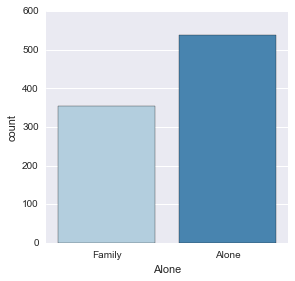

In [51]:
sns.factorplot('Alone',data=titanic_df,kind="count",palette='Blues')

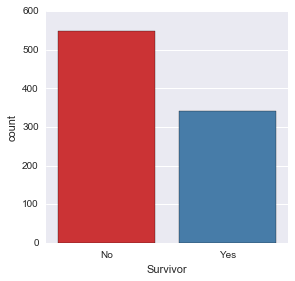

In [32]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})
sns.factorplot('Survivor',kind="count",data=titanic_df,palette='Set1')

In [ ]:
#Now lets see what are the factors affecting survival count

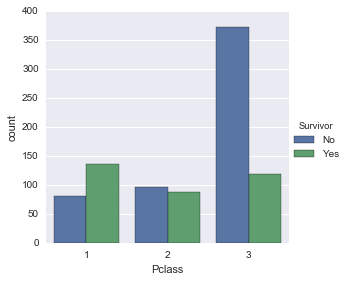

In [33]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue="Survivor")

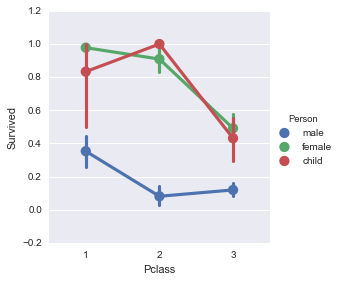

In [34]:
# More clear picture(Does Age and Sex affect survival rate?)
sns.factorplot('Pclass','Survived',hue="Person",data=titanic_df)

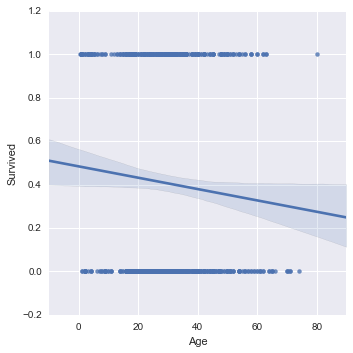

In [35]:
sns.lmplot('Age','Survived',data=titanic_df)

In [56]:
#General trend from the above figure is older the passenger, less likely they survived

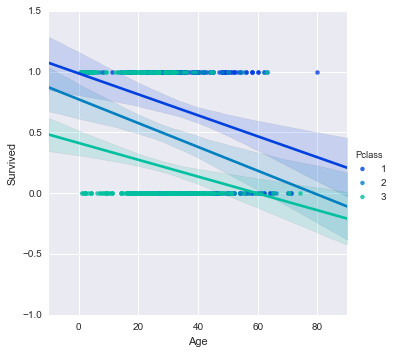

In [36]:
sns.lmplot('Age','Survived',hue="Pclass",data=titanic_df,palette='winter')

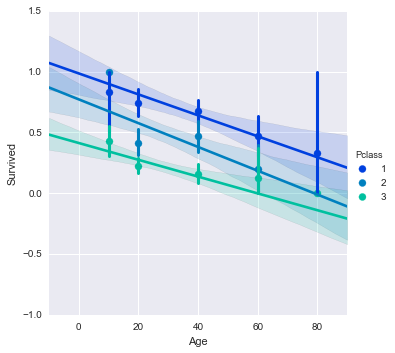

In [37]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

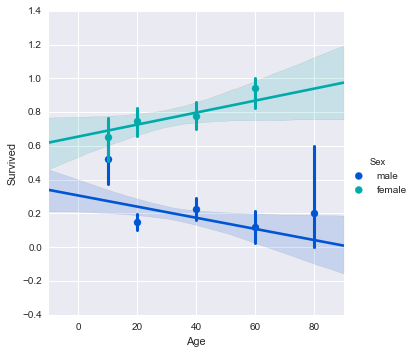

In [38]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [39]:
#From the above plot its clear that older females had high survival rate

In [40]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  Person   Alone Survivor  
0      0         A/5 21171   7.2500   NaN        S    male  Family       No  
1      0          PC 17599  71.2833   C85        C  female  Family      Yes  
2      0  STON/O2. 3101282   7.9250   NaN        S  female   Alone      Yes  
3      0            113803  53.1000  C123        S  female  Family      Yes  
4      0            373450   8.0500   NaN        S    male   Alone       No

In [41]:
cabin_df.head()

Cabin
0     C
1     C
2     E
3     G
4     C

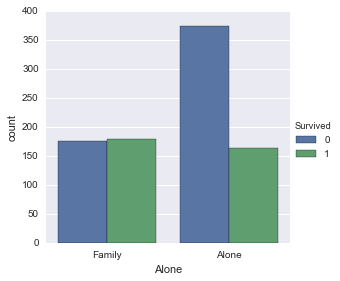

In [44]:
sns.factorplot('Alone',data=titanic_df,kind="count",hue='Survived')

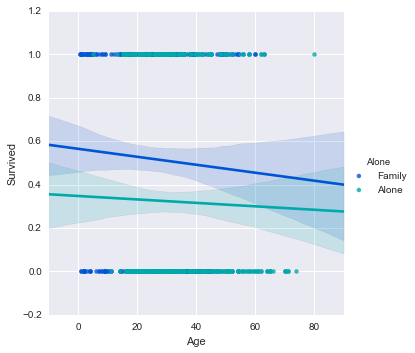

In [102]:
sns.lmplot('Age','Survived',hue="Alone",data=titanic_df,palette='winter')


From the above over all titanic data analysis we have seen different factors affected the survival chances of the people. Factors include Age, Gender, Class etc.,